In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split

In [26]:
df = pd.read_csv("/content/drive/MyDrive/IDS/car/car_data.txt",sep=",",header=None,names=['buying','maint','doors','person','lug_boot','safety','class'])
df

,buying,maint,doors,person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [27]:
df.isnull().sum()

buying      0
maint       0
doors       0
person      0
lug_boot    0
safety      0
class       0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   person    1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [29]:
df['doors'].value_counts()

2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

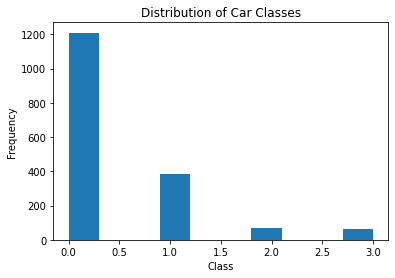

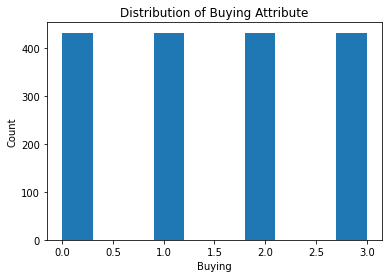

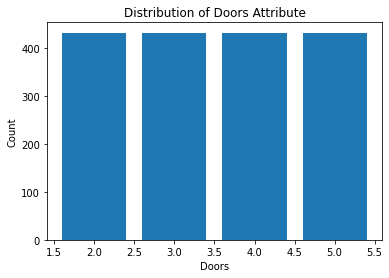

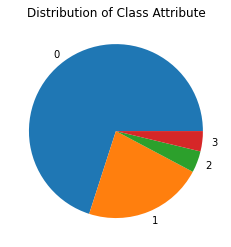

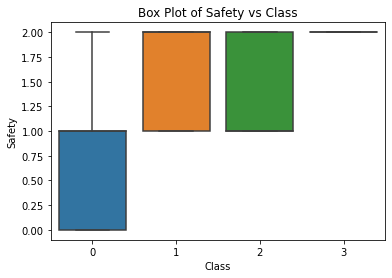

In [37]:
plt.hist(df["class"])
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Distribution of Car Classes")
plt.show()

# Plot a histogram of the buying attribute
plt.hist(df['buying'])
plt.xlabel('Buying')
plt.ylabel('Count')
plt.title('Distribution of Buying Attribute')
plt.show()

# Plot a bar plot of the doors attribute
plt.bar(df['doors'].unique(), df['doors'].value_counts())
plt.xlabel('Doors')
plt.ylabel('Count')
plt.title('Distribution of Doors Attribute')
plt.show()

# Plot a pie chart of the class attribute
plt.pie(df['class'].value_counts(), labels=df['class'].unique())
plt.title('Distribution of Class Attribute')
plt.show()


# Box plot of 'safety' and 'class' attributes
sns.boxplot(x='class', y='safety', data=df)
plt.xlabel('Class')
plt.ylabel('Safety')
plt.title('Box Plot of Safety vs Class')
plt.show()

In [32]:
df['doors'] = df['doors'].map({'2':2,'3':3,'4':4,'5more':5}) #Here 5 means 5 or more
df['person'] = df['person'].map({'2':2,'4':4,'more':5}) #Here 5 means 5 or more

In [33]:
df

,buying,maint,doors,person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5,5,med,med,good
1724,low,low,5,5,med,high,vgood
1725,low,low,5,5,big,low,unacc
1726,low,low,5,5,big,med,good


In [34]:
obj_en = df.select_dtypes("object").columns

In [38]:
def encode(col):
  en_map = {k:v for v,k in enumerate(df[col].unique())}
  df[col] = df[col].map(en_map)
  return en_map

In [35]:
ls_dc = []
for i in obj_en:
  ls_dc.append(encode(i))
ls_dc

[{'vhigh': 0, 'high': 1, 'med': 2, 'low': 3},
 {'vhigh': 0, 'high': 1, 'med': 2, 'low': 3},
 {'small': 0, 'med': 1, 'big': 2},
 {'low': 0, 'med': 1, 'high': 2},
 {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}]

In [36]:
ls_dc = ls_dc[0:2] + [{'2':2,'3':3,'4':4,'5more':5}, {'2':2,'4':4,'more':5}] +ls_dc[2:]
ls_dc

[{'vhigh': 0, 'high': 1, 'med': 2, 'low': 3},
 {'vhigh': 0, 'high': 1, 'med': 2, 'low': 3},
 {'2': 2, '3': 3, '4': 4, '5more': 5},
 {'2': 2, '4': 4, 'more': 5},
 {'small': 0, 'med': 1, 'big': 2},
 {'low': 0, 'med': 1, 'high': 2},
 {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}]

In [39]:
df

,buying,maint,doors,person,lug_boot,safety,class
0,0,0,2,2,0,0,0
1,0,0,2,2,0,1,0
2,0,0,2,2,0,2,0
3,0,0,2,2,1,0,0
4,0,0,2,2,1,1,0
...,...,...,...,...,...,...,...
1723,3,3,5,5,1,1,2
1724,3,3,5,5,1,2,3
1725,3,3,5,5,2,0,0
1726,3,3,5,5,2,1,2


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1728 non-null   int64
 1   maint     1728 non-null   int64
 2   doors     1728 non-null   int64
 3   person    1728 non-null   int64
 4   lug_boot  1728 non-null   int64
 5   safety    1728 non-null   int64
 6   class     1728 non-null   int64
dtypes: int64(7)
memory usage: 94.6 KB


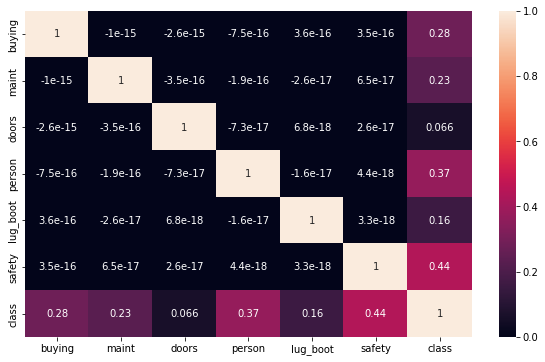

In [41]:
corr_df = df.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(data = corr_df, annot = True)
plt.show()

In [42]:
 y = df['class']
 X = df.drop('class',axis=1)

 X

,buying,maint,doors,person,lug_boot,safety
0,0,0,2,2,0,0
1,0,0,2,2,0,1
2,0,0,2,2,0,2
3,0,0,2,2,1,0
4,0,0,2,2,1,1
...,...,...,...,...,...,...
1723,3,3,5,5,1,1
1724,3,3,5,5,1,2
1725,3,3,5,5,2,0
1726,3,3,5,5,2,1


In [43]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1723    2
1724    3
1725    0
1726    2
1727    3
Name: class, Length: 1728, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 24)

In [45]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
sc2 = StandardScaler()
X_train = sc1.fit_transform(X_train)
X_test = sc2.fit_transform(X_test)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,plot_confusion_matrix, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import RFE, mutual_info_classif

In [47]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print(f"Accuracy: {accuracy*100}")
print(f"Precision: {precision*100}")
print(f"Recall: {recall*100}")

Accuracy: 83.62235067437379
Precision: 77.64213899081484
Recall: 64.83330134962885


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


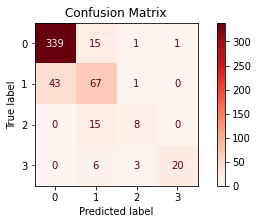

In [49]:
class_names = [0,1,2,3]
fig, ax = plt.subplots(figsize=(7,3))
plot_confusion_matrix(model1, X_test, y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

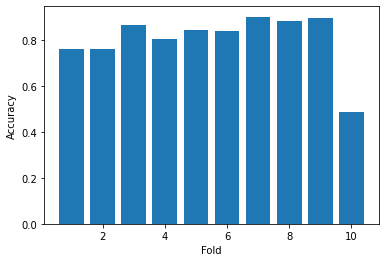

In [50]:
scores = cross_val_score(model1, X, y, cv=10)

# Plot the results of the cross-validation
plt.bar(range(1, 11), scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

In [51]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print(f"Accuracy: {accuracy*100}")
print(f"Precision: {precision*100}")
print(f"Recall: {recall*100}")

Accuracy: 98.07321772639692
Precision: 97.40406807445913
Recall: 95.47255487045423


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


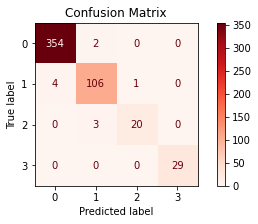

In [52]:
class_names = [0,1,2,3]
fig, ax = plt.subplots(figsize=(7,3))
plot_confusion_matrix(model2, X_test, y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

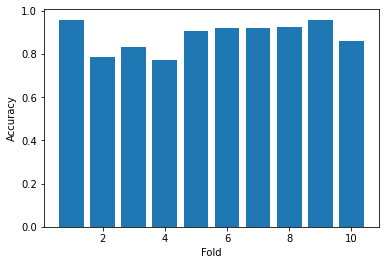

In [53]:
scores = cross_val_score(model2, X, y, cv=10)

# Plot the results of the cross-validation
plt.bar(range(1, 11), scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

In [54]:
model3 = GaussianNB()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print(f"Accuracy: {accuracy*100}")
print(f"Precision: {precision*100}")
print(f"Recall: {recall*100}")

Accuracy: 79.76878612716763
Precision: 47.315034269063446
Recall: 47.50519327339063


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


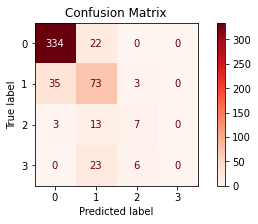

In [55]:
class_names = [0,1,2,3]
fig, ax = plt.subplots(figsize=(7,3))
plot_confusion_matrix(model3, X_test, y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

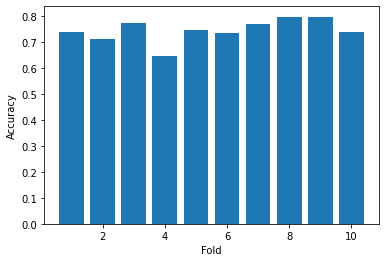

In [56]:
scores = cross_val_score(model3, X, y, cv=10)

# Plot the results of the cross-validation
plt.bar(range(1, 11), scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

In [57]:
model4 = RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print(f"Accuracy: {accuracy*100}")
print(f"Precision: {precision*100}")
print(f"Recall: {recall*100}")

Accuracy: 97.10982658959537
Precision: 92.80284916637515
Recall: 90.45547925247823


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


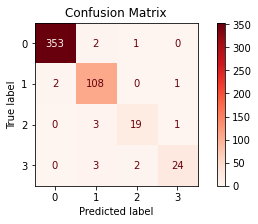

In [58]:
class_names = [0,1,2,3]
fig, ax = plt.subplots(figsize=(7,3))
plot_confusion_matrix(model4, X_test, y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

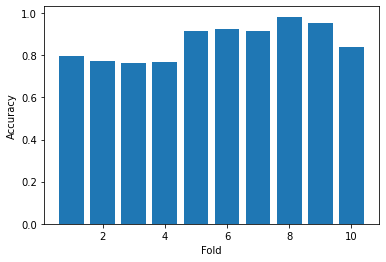

In [59]:
scores = cross_val_score(model4, X, y, cv=10)

# Plot the results of the cross-validation
plt.bar(range(1, 11), scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

In [60]:
model5 = SVC()
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro")
recall = recall_score(y_test, y_pred, average="macro")

print(f"Accuracy: {accuracy*100}")
print(f"Precision: {precision*100}")
print(f"Recall: {recall*100}")

Accuracy: 94.41233140655106
Precision: 93.74216537443706
Recall: 82.28693882636574


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


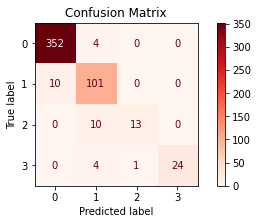

In [61]:
class_names = [0,1,2,3]
fig, ax = plt.subplots(figsize=(7,3))
plot_confusion_matrix(model5, X_test, y_test,cmap=plt.cm.Reds,labels=class_names,ax=ax,values_format = '.0f')
plt.title('Confusion Matrix')
plt.grid(False)
plt.show()

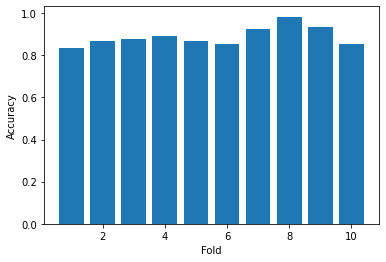

In [62]:
scores = cross_val_score(model5, X, y, cv=10)

# Plot the results of the cross-validation
plt.bar(range(1, 11), scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

Training Model after selecting it


In [63]:
# Tune the model's hyperparameters using grid search
param_grid = {'max_depth': [2, 5, 10, 20, 50], 'min_samples_split': [2, 5, 10, 20]}
grid_search = GridSearchCV(model2, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print(f'Best hyperparameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_:.2f}')


# Perform feature selection using recursive feature elimination
selector = RFE(model2, n_features_to_select=5)
selector.fit(X_train, y_train)

# Print the selected features
print(f'Selected features: {df.columns[:-1][selector.support_]}')

Best hyperparameters: {'max_depth': 20, 'min_samples_split': 2}
Best score: 0.98
Selected features: Index(['buying', 'maint', 'person', 'lug_boot', 'safety'], dtype='object')


In [64]:
ls_dc

[{'vhigh': 0, 'high': 1, 'med': 2, 'low': 3},
 {'vhigh': 0, 'high': 1, 'med': 2, 'low': 3},
 {'2': 2, '3': 3, '4': 4, '5more': 5},
 {'2': 2, '4': 4, 'more': 5},
 {'small': 0, 'med': 1, 'big': 2},
 {'low': 0, 'med': 1, 'high': 2},
 {'unacc': 0, 'acc': 1, 'good': 2, 'vgood': 3}]

In [65]:
# Define the new data to make predictions on
new_data = pd.DataFrame([['vhigh', 'vhigh', '2', '2', 'small', 'low', 'acc'],
                         ['high', 'high', '4', 'more', 'big', 'high', 'vgood'],
                         ['low', 'low', '3', '2', 'med', 'med', 'vgood']])

for i in range(7):
  new_data[i] = new_data[i].map(ls_dc[i])

y_true = new_data[6]
new_data = new_data.drop(6,axis=1)

# Use the model to predict the labels for the new data
new_data_pred = model2.predict(new_data)

# Actual Label
print(f'Actual Labels: {list(y_true)}') 
# Print the predictions
print(f'Predictions: {new_data_pred}')

Actual Labels: [1, 3, 3]
Predictions: [1 3 3]
